# EDA(Exploratory Data Analysis)
'analyze' and 'summarize'

by Warda Gull

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Analyze

In [2]:
df= sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Summarize

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum() * 100 / len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

<Axes: >

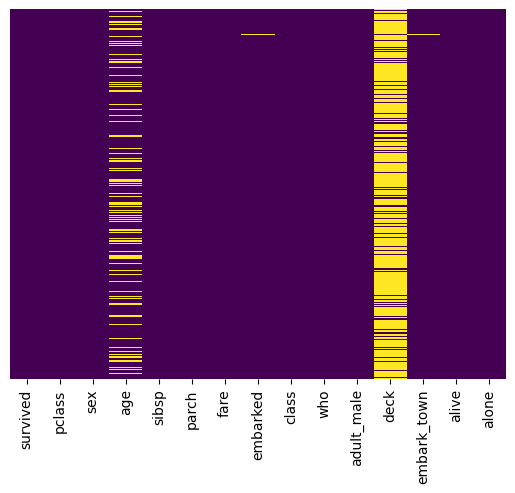

In [6]:
# Visualize Data Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.drop(columns='deck',inplace=True)

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: xlabel='survived', ylabel='count'>

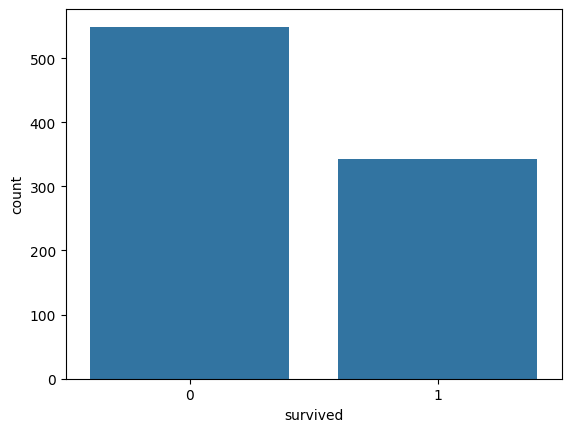

In [9]:
# visualize dataset
sns.countplot(data=df,x='survived')

<Axes: xlabel='pclass', ylabel='fare'>

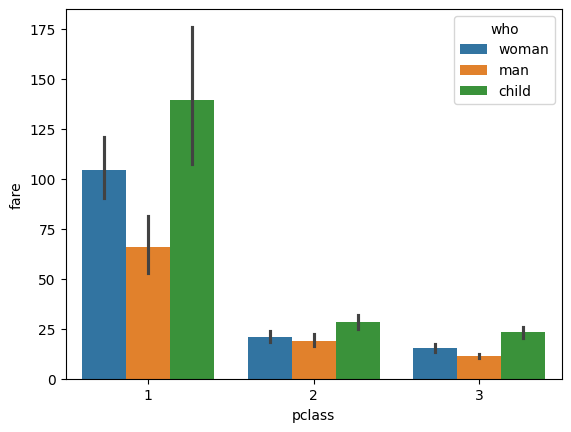

In [10]:
sns.barplot(data=df,x='pclass',y='fare', hue='who')

<Axes: xlabel='age', ylabel='Count'>

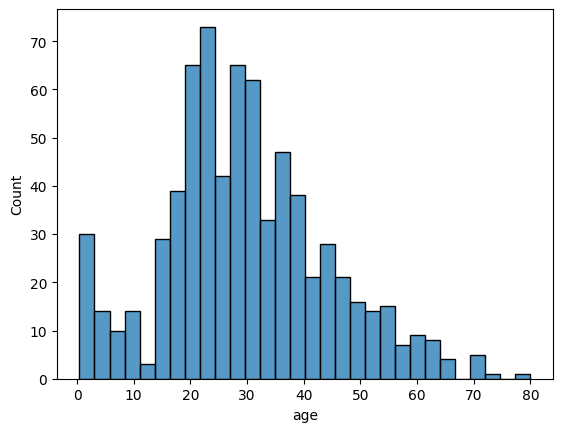

In [11]:
sns.histplot(data=df,x='age',bins=30)

<Axes: >

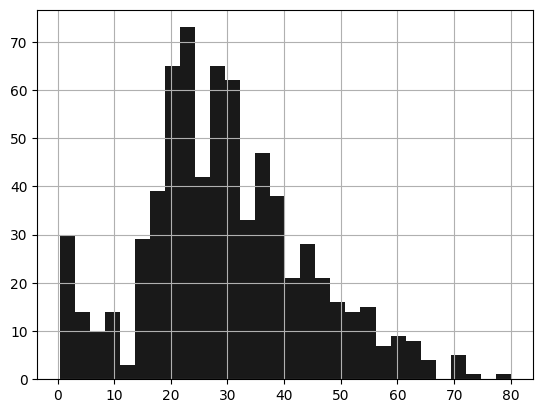

In [12]:
df['age'].hist(bins=30, alpha=0.9, color='black')

<Axes: xlabel='survived', ylabel='age'>

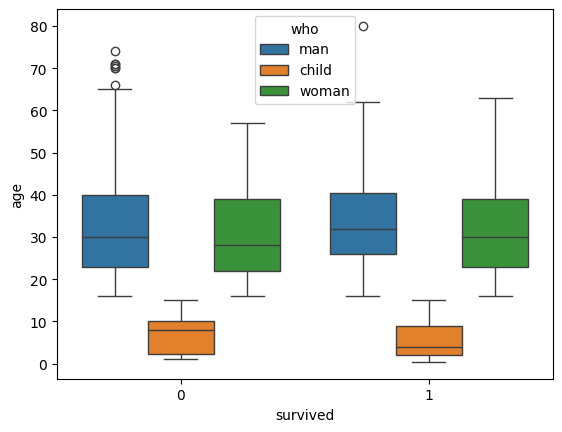

In [13]:
sns.boxplot(data=df,y='age', x='survived', hue='who')

![image](extra\pic.png)

(0.0, 300.0)

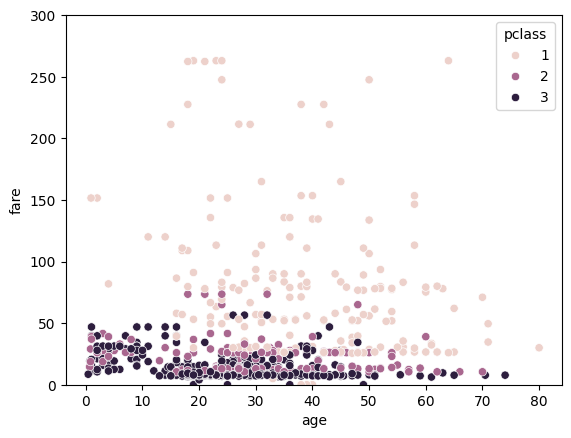

In [14]:
# scatter
sns.scatterplot(data=df,x='age',y='fare',hue='pclass')
plt.ylim(0,300)

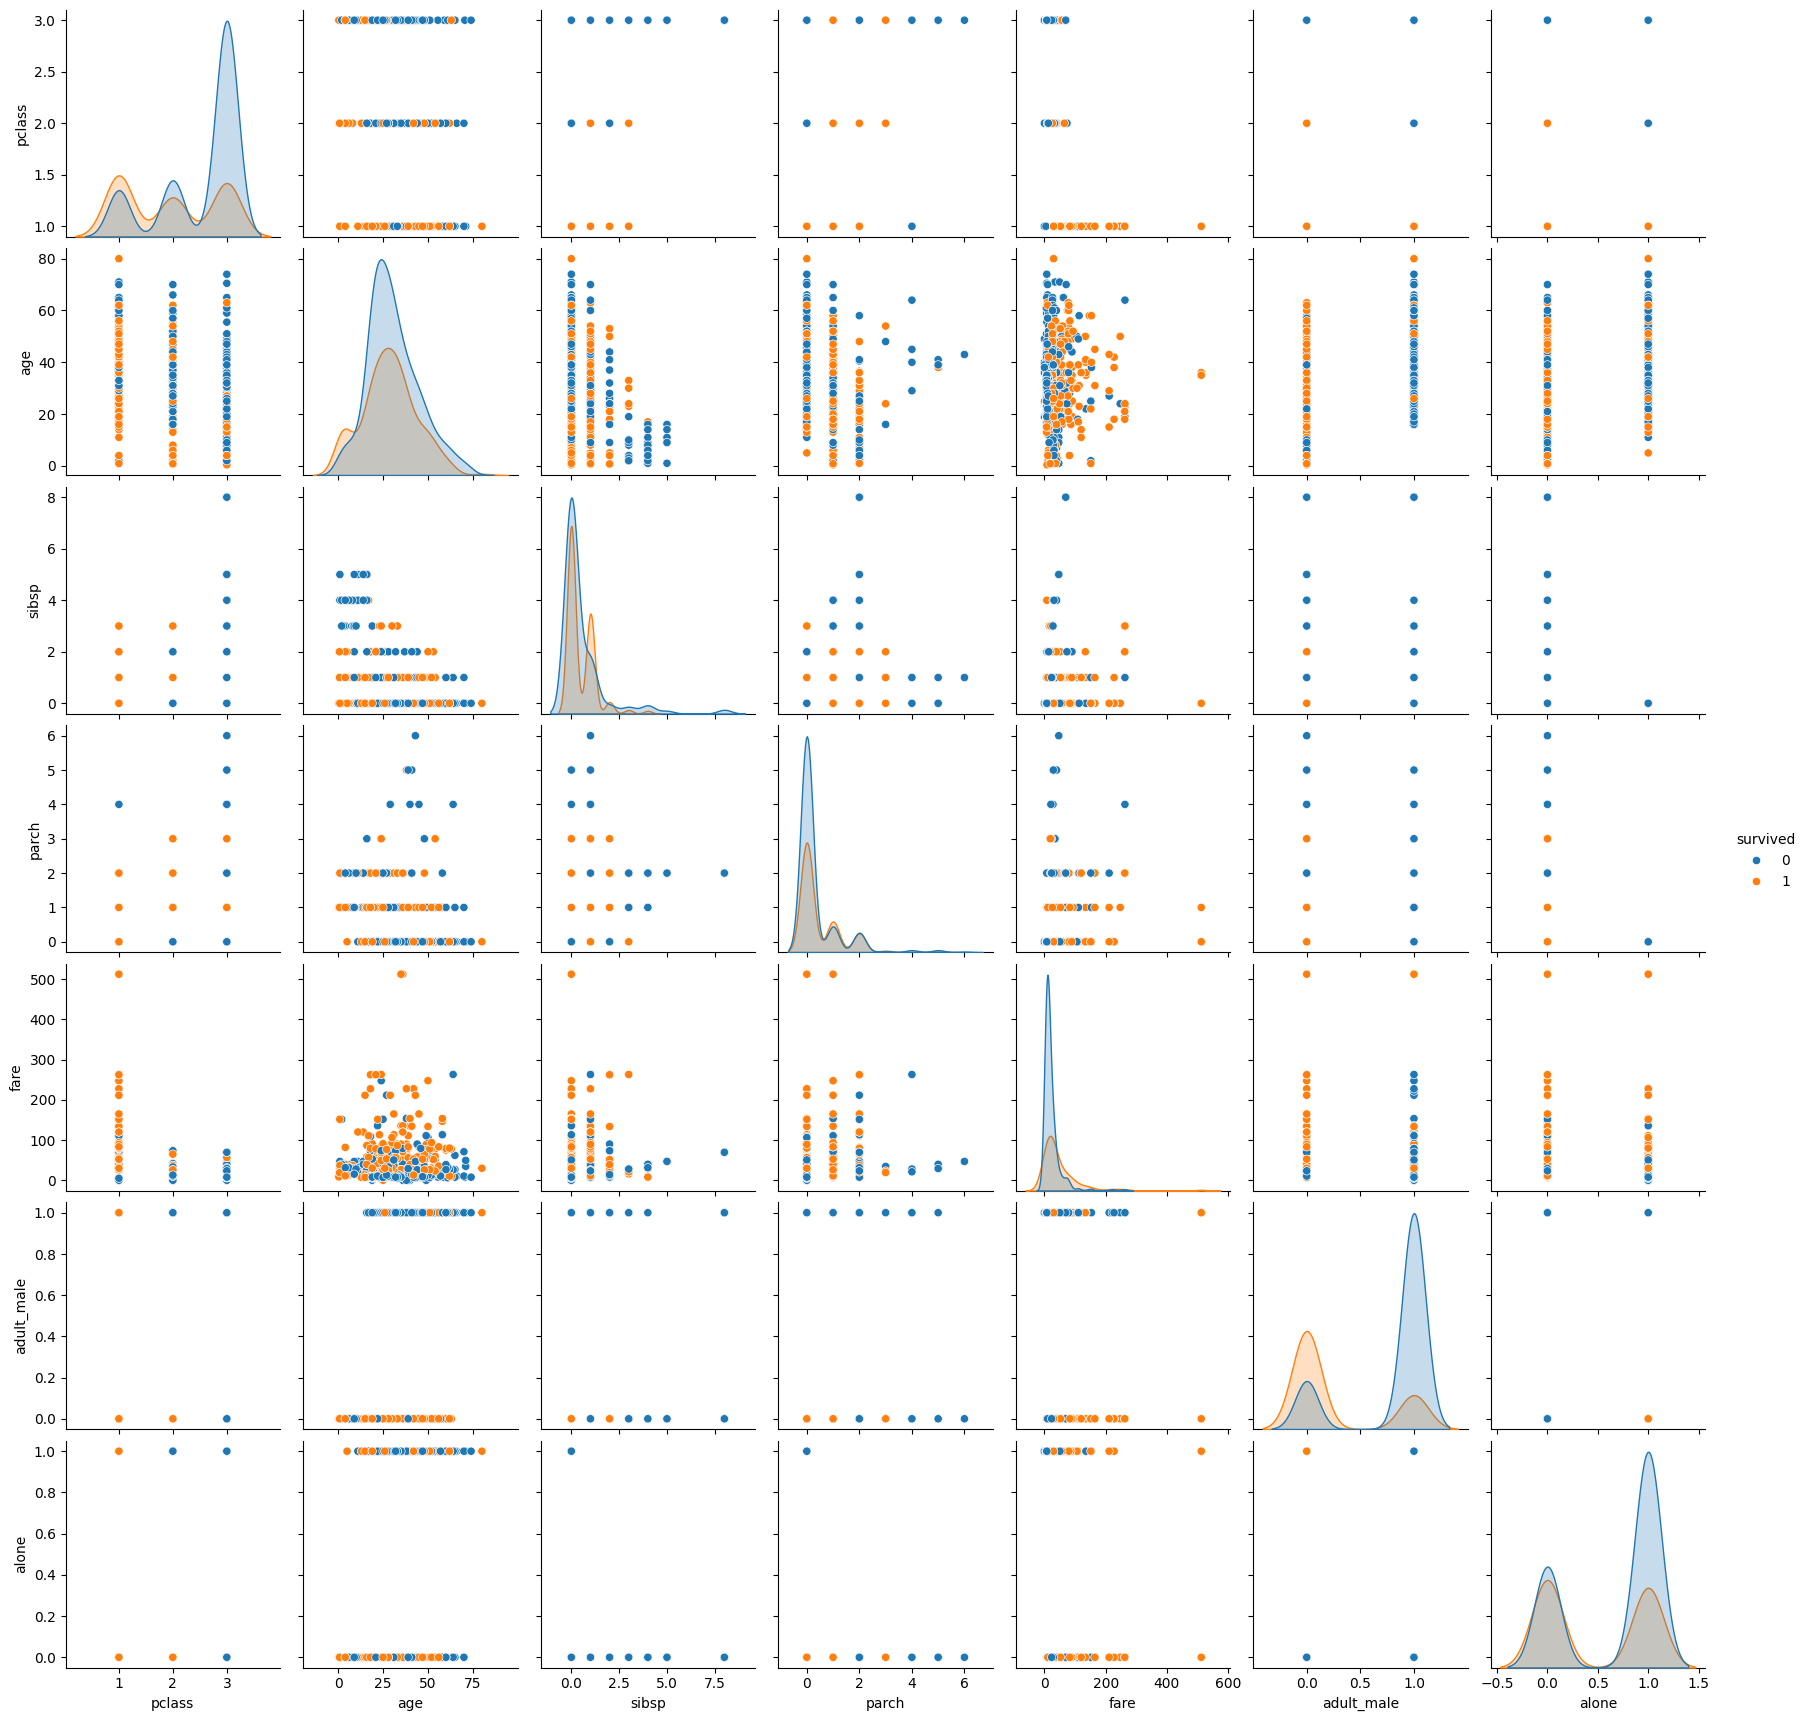

In [15]:
sns.pairplot(data=df, hue='survived')

<Axes: xlabel='pclass'>

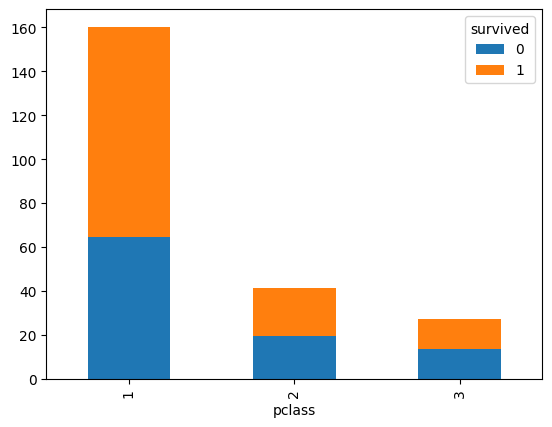

In [16]:
df.groupby(['pclass','survived'])['fare'].mean().unstack().plot(kind='bar',stacked=True)

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='survived', ylabel='fare'>

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


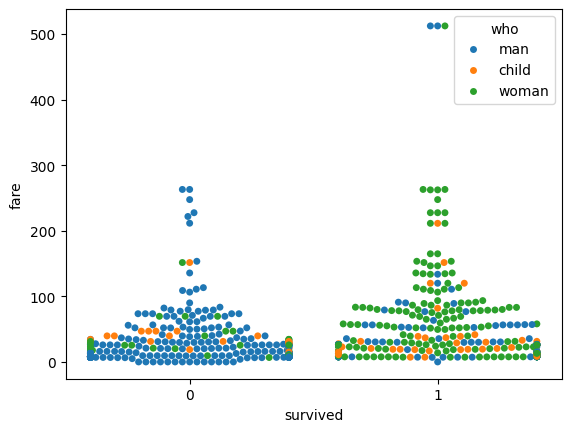

In [17]:
# swarm
sns.swarmplot(data=df, x='survived', y='fare', hue='who')

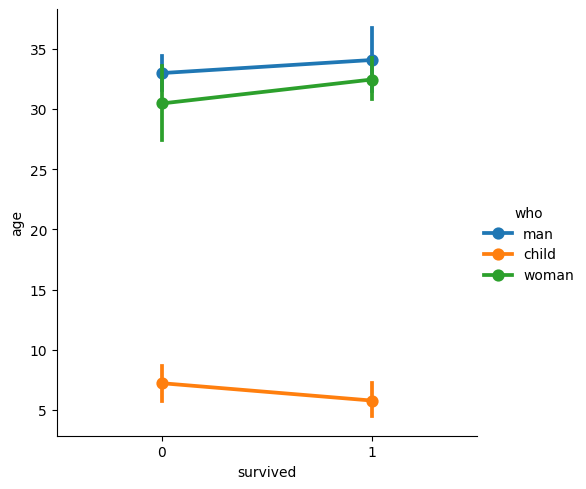

In [18]:
sns.catplot(data=df, x='survived', y='age', kind='point',hue='who')

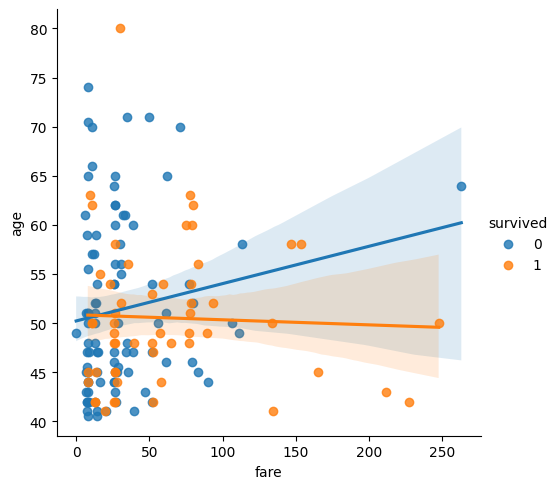

In [19]:

sns.lmplot(data=df.query('fare < 300 & age>40' ), x='fare', y='age', hue='survived')

# sns.lmplot(data=df, x='fare', y='age', hue='survived')


In [20]:
# How to categorize the age data and convert it into diferent columns

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [21]:

df['age_groups'] = pd.cut(
                          df['age'],
                          [0, 10, 18, 30, 50, 80],
                          labels=['Kids', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

                          


In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


<Axes: xlabel='age_groups'>

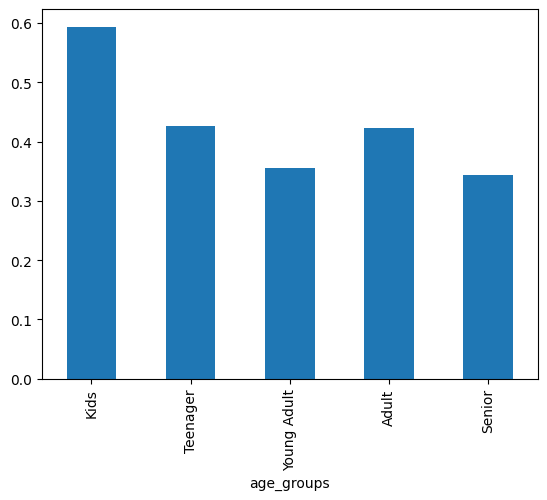

In [23]:
df.groupby('age_groups')['survived'].mean().plot(kind='bar')

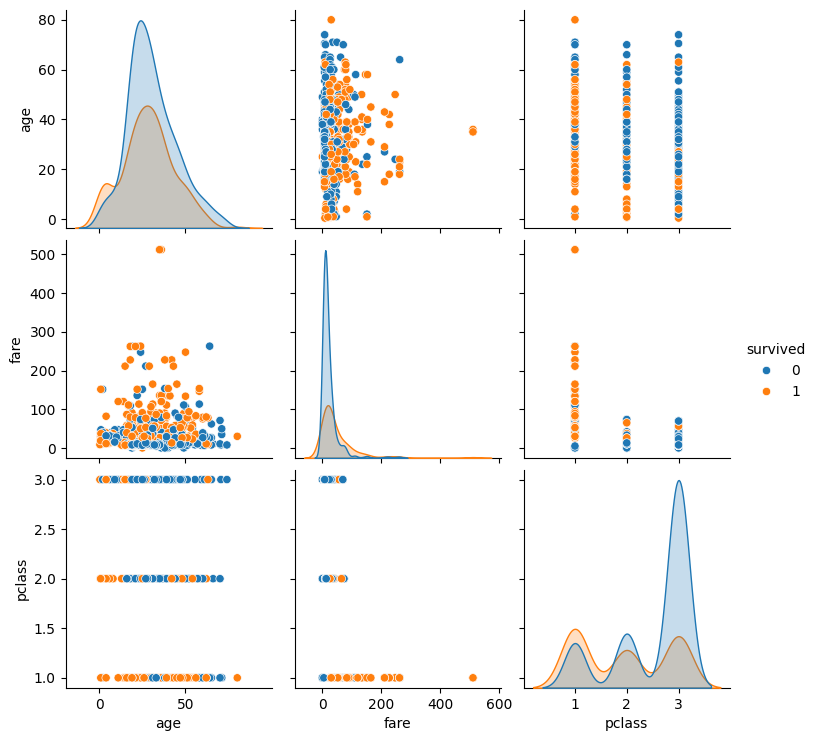

In [24]:
sns.pairplot(data=df, hue='survived', vars=['age','fare','pclass']) 

In [25]:
#  add family size column
df['family_size'] = df['sibsp'] + df['parch']
df['alone']= 1
df['alone'].loc[df['family_size'] > 1] =0

C:\Users\Fcc\AppData\Local\Temp\ipykernel_2684\1463544817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alone'].loc[df['family_size'] > 1] =0
